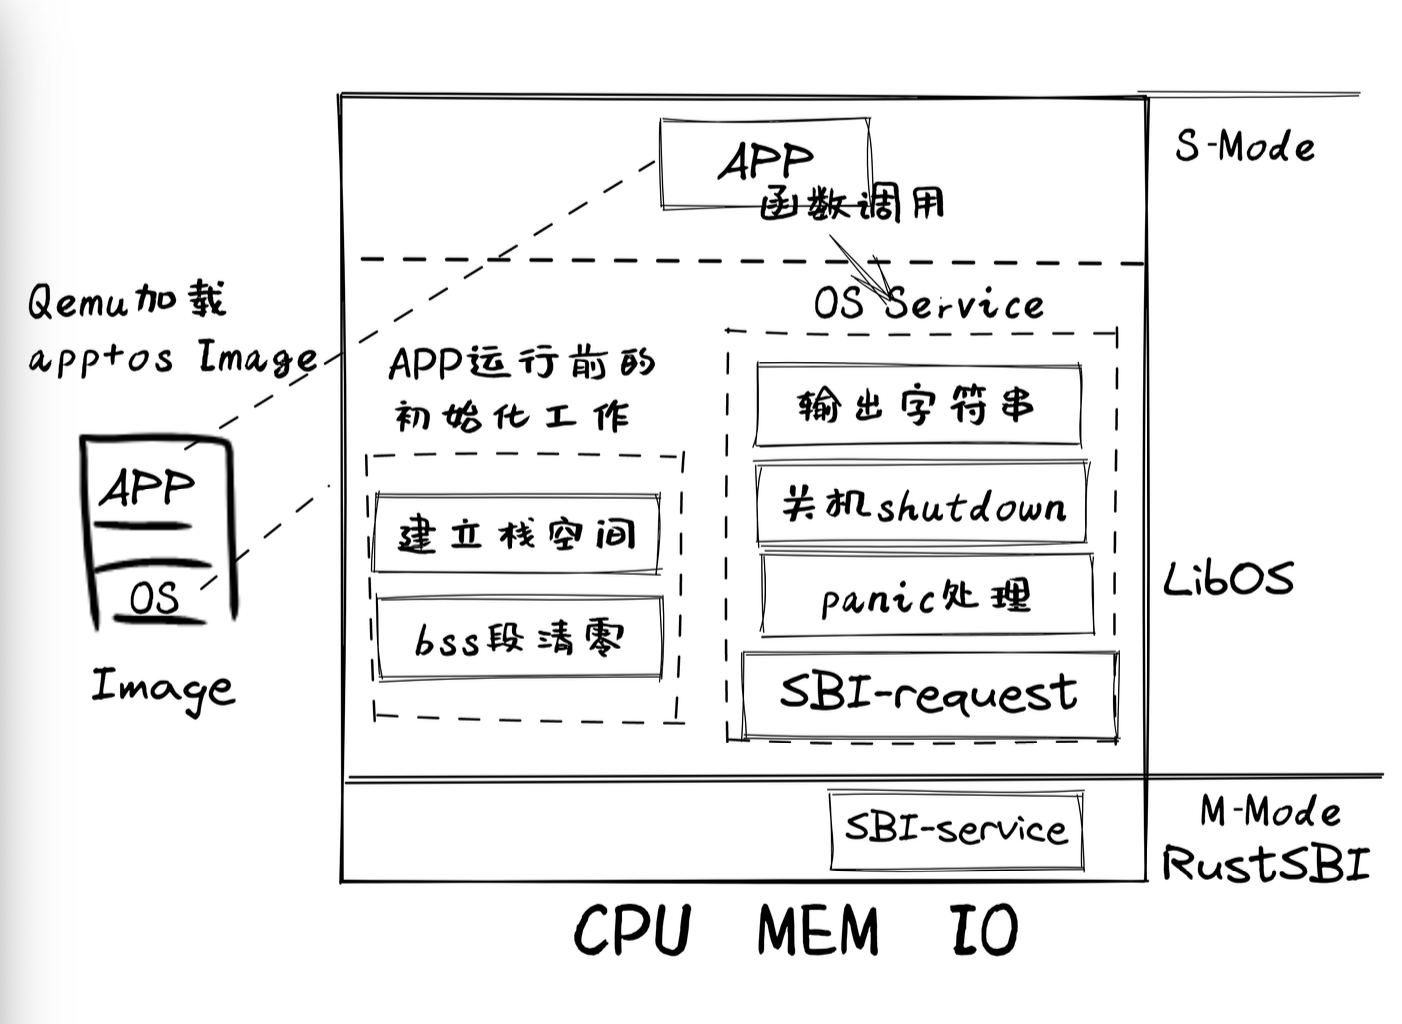

## 系统调用(System Call) 

`sudo dtruss ./temp` will show the system calls that the program `temp` makes on MacOS.


#### 2.2.4 目标平台与目标三元组

1. 源代码（source code）–> 预处理器（preprocessor）–> 宏展开的源代码
2. 宏展开的源代码–> 编译器（compiler）–> 汇编程序
3. 汇编程序–> 汇编器（assembler）–> 目标代码（object code）
4. 目标代码–> 链接器（linker）–> 可执行文件（executables）

这里平台主要是指CPU 类型、操作系统类型和标准运行时库的组合。

```bash
rustc 1.85.0-nightly (d49be02cf 2024-12-02)
binary: rustc
host: aarch64-apple-darwin
release: 1.85.0-nightly
LLVM version: 19.1.4
```

### 2.3 移除标准库依赖

- 交叉编译，设置目标平台  `riscv64gc-unknown-none-elf`
- 移除标准库依赖，`#![no_std]`
- redirect panic，`#[panic_handler]`
- remove init before main，`#![no_main]`

machine start sequence:

1. run firmware code (BIOS) on the motherboard, load the bootloader from the disk.
2. bootloader loads the kernel from the disk.
3. kernel starts the init process.
4. load the root file system.
5. system init service.

Qemu start sequence:

1. 即作把作为bootloader 的rustsbi-qemu.bin 加载到物理内存以物理地址0x80000000 开头的区域上，
2. 同时把内核镜像os.bin 加载到以物理地 0x80200000 开头的区域上。
3. by the 'link.ld' file, set the first code to ".section .text.entry" on the 0x80200000.
4. config function run stack, goto call rust_main().